In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 向量化的训练数据
x_train = vectorize_sequences(train_data)
# 测试数据
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 10s 407us/step - loss: 0.4654 - acc: 0.8162 - val_loss: 0.3483 - val_acc: 0.8741
Epoch 2/20
25000/25000 [==============================] - 8s 335us/step - loss: 0.2646 - acc: 0.9062 - val_loss: 0.3044 - val_acc: 0.8785
Epoch 3/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.2039 - acc: 0.9256 - val_loss: 0.3168 - val_acc: 0.8714
Epoch 4/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.1687 - acc: 0.9412 - val_loss: 0.3089 - val_acc: 0.8777
Epoch 5/20
25000/25000 [==============================] - 3s 137us/step - loss: 0.1466 - acc: 0.9485 - val_loss: 0.3101 - val_acc: 0.8798
Epoch 6/20
25000/25000 [==============================] - 5s 216us/step - loss: 0.1248 - acc: 0.9578 - val_loss: 0.3620 - val_acc: 0.8672
Epoch 7/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.1089 - acc: 0.9636 - val_loss: 0.3574 -

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.5658 - acc: 0.7700 - val_loss: 0.4789 - val_acc: 0.8562
Epoch 2/20
25000/25000 [==============================] - 5s 180us/step - loss: 0.3975 - acc: 0.8874 - val_loss: 0.3826 - val_acc: 0.8766
Epoch 3/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.3030 - acc: 0.9105 - val_loss: 0.3228 - val_acc: 0.8840
Epoch 4/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.2483 - acc: 0.9214 - val_loss: 0.2950 - val_acc: 0.8888
Epoch 5/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.2145 - acc: 0.9300 - val_loss: 0.2848 - val_acc: 0.8888
Epoch 6/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.1903 - acc: 0.9368 - val_loss: 0.2795 - val_acc: 0.8891
Epoch 7/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.1721 - acc: 0.9423 - val_loss: 0.2813 - 

In [23]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

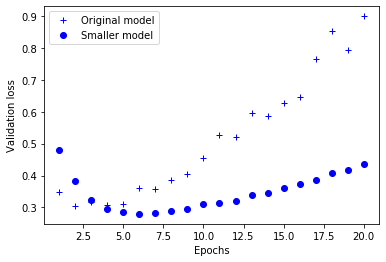

In [24]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [25]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 17s 684us/step - loss: 0.4637 - acc: 0.7918 - val_loss: 0.3759 - val_acc: 0.8406
Epoch 2/20
25000/25000 [==============================] - 16s 654us/step - loss: 0.2311 - acc: 0.9080 - val_loss: 0.3054 - val_acc: 0.8782
Epoch 3/20
25000/25000 [==============================] - 16s 641us/step - loss: 0.1365 - acc: 0.9492 - val_loss: 0.3578 - val_acc: 0.8669
Epoch 4/20
25000/25000 [==============================] - 23s 936us/step - loss: 0.0746 - acc: 0.9751 - val_loss: 0.4026 - val_acc: 0.8806
Epoch 5/20
25000/25000 [==============================] - 15s 619us/step - loss: 0.0565 - acc: 0.9876 - val_loss: 0.4876 - val_acc: 0.8810
Epoch 6/20
25000/25000 [==============================] - 21s 854us/step - loss: 0.0936 - acc: 0.9862 - val_loss: 0.5582 - val_acc: 0.8600
Epoch 7/20
25000/25000 [==============================] - 15s 605us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.

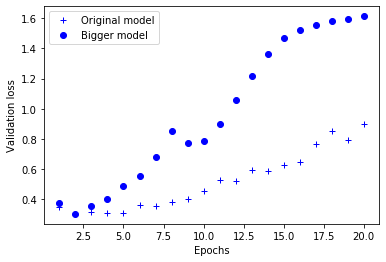

In [26]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

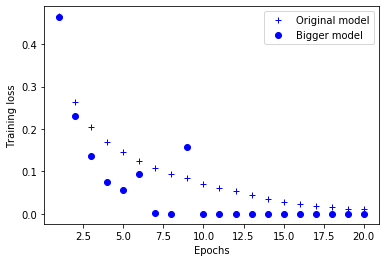

In [27]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [28]:
from keras import regularizers


# 添加权重正则化
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), #L1 正则化
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), #L2 正则化
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [30]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 276us/step - loss: 0.5022 - acc: 0.8162 - val_loss: 0.3826 - val_acc: 0.8845
Epoch 2/20
25000/25000 [==============================] - 4s 140us/step - loss: 0.3180 - acc: 0.9072 - val_loss: 0.3341 - val_acc: 0.8904
Epoch 3/20
25000/25000 [==============================] - 4s 159us/step - loss: 0.2700 - acc: 0.9206 - val_loss: 0.3293 - val_acc: 0.8889
Epoch 4/20
25000/25000 [==============================] - 4s 160us/step - loss: 0.2490 - acc: 0.9296 - val_loss: 0.3855 - val_acc: 0.8632
Epoch 5/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.2354 - acc: 0.9350 - val_loss: 0.3427 - val_acc: 0.8834
Epoch 6/20
25000/25000 [==============================] - 4s 140us/step - loss: 0.2263 - acc: 0.9374 - val_loss: 0.3545 - val_acc: 0.8802
Epoch 7/20
25000/25000 [==============================] - 4s 140us/step - loss: 0.2198 - acc: 0.9420 - val_loss: 0.3608 - 

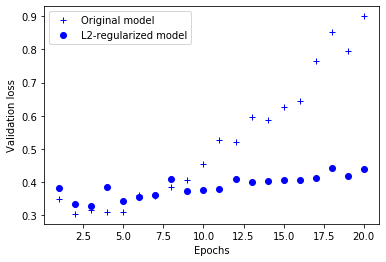

In [31]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()